In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from IPython.display import clear_output

#import joblib
#import math

import keras
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import KFold
from sklearn.preprocessing import Normalizer
#from sklearn.pipeline import Pipeline
#from sklearn.neural_network import MLPRegressor
#from sklearn.model_selection import train_test_split

#import requests

# read the data

In [10]:
df_North = pd.read_csv('my_data_North.csv', header=None)
df_South = pd.read_csv('my_data_South.csv', header=None)

In [11]:
print(df_North.shape)
print(df_South.shape)

(95278, 39)
(95020, 39)


# extract features and labels

In [12]:
numpy_North = df_North.to_numpy()
numpy_South = df_South.to_numpy()

In [13]:
features_North = numpy_North[:,:-1]
features_South = numpy_South[:,:-1]
labels_North = numpy_North[:,-1]
labels_South = numpy_South[:,-1]

In [14]:
print(features_North.shape)
print(labels_North.shape)
print(features_South.shape)
print(labels_South.shape)

(95278, 38)
(95278,)
(95020, 38)
(95020,)


In [15]:
features = [features_North, features_South]
labels = [labels_North, labels_South]
file_model_names = ['model_North.h5', 'model_South.h5']
dim_input = features_North.shape[1]

# Neural Network

# Keras

In [16]:
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();

my_callbacks = [PlotLosses(),
                EarlyStopping(monitor='val_loss', patience=50, mode='auto', min_delta=0.1)]

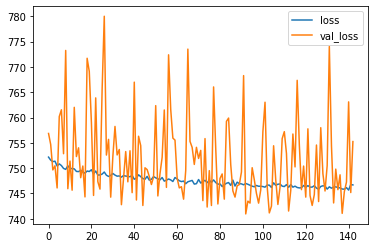

In [18]:
# with loaded model
for i in range(2):    
    X_train = features[i]
    y_train = labels[i]
    
    scaler = Normalizer()
    X_train = scaler.transform(X_train)
    
    model = load_model(file_model_names[i])

    model.fit(X_train, y_train, validation_split=0.1, 
                        epochs=500, batch_size=64, verbose=0,
                        callbacks = my_callbacks)
    
    model.save(file_model_names[i])

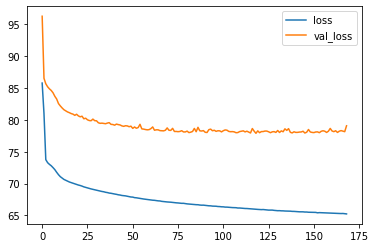

In [9]:
# with new model created
for i in range(2):    
    X_train = features[i]
    y_train = labels[i]
    
    scaler = Normalizer()
    X_train = scaler.transform(X_train)
    
    model = Sequential()
    model.add(Dense(26, input_dim=dim_input, activation='sigmoid', kernel_initializer='he_uniform'))
    model.add(Dense(15, activation='sigmoid'))
    model.add(Dense(7, activation='sigmoid'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

    model.fit(X_train, y_train, validation_split=0.1, 
                        epochs=500, batch_size=64, verbose=0,
                        callbacks = my_callbacks)
    
    model.save(file_model_names[i])

In [14]:
for i in range(2):    
    #X_train, X_test, y_train, y_test = train_test_split(features[i], labels[i], test_size=0.30)
    X_train = features[i]
    
    scaler = StandardScaler()
    
    # Fit only to the training data
    scaler.fit(X_train)
    
    joblib.dump(scaler, file_scaler_names[i])

# Old code=---

In [19]:
for i in range(2):    
    X_train, X_test, y_train, y_test = train_test_split(features[i], labels[i], test_size=0.30)
    scaler = StandardScaler()
    # Fit only to the training data
    scaler.fit(X_train)

    # Now apply the transformations to the data:
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    mlp = MLPRegressor(hidden_layer_sizes=(1200, 700, 200), activation='logistic', 
                       early_stopping=False, random_state=2,
                       batch_size=400, learning_rate_init=0.01,
                       verbose=1, max_iter=100)
    mlp.fit(X_train, y_train)
    
    joblib.dump(mlp, file_model_names[i])
    joblib.dump(scaler, file_scaler_names[i])
    
    print('train score: ', mlp.score(X_train, y_train))
    print('test score: ', mlp.score(X_test, y_test))

Iteration 1, loss = 3.04817053
Iteration 2, loss = 2.81906542
Iteration 3, loss = 2.81013029
Iteration 4, loss = 1.98748582
Iteration 5, loss = 1.19026646
Iteration 6, loss = 0.84632926
Iteration 7, loss = 0.66481844
Iteration 8, loss = 0.58025870
Iteration 9, loss = 0.49791816
Iteration 10, loss = 0.44718108
Iteration 11, loss = 0.42759376
Iteration 12, loss = 0.40757651
Iteration 13, loss = 0.41208188
Iteration 14, loss = 0.40228688
Iteration 15, loss = 0.39447076
Iteration 16, loss = 0.38371516
Iteration 17, loss = 0.35847648
Iteration 18, loss = 0.35993490
Iteration 19, loss = 0.36674293
Iteration 20, loss = 0.36287561


/home/dim314159/.local/lib/python3.5/site-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


train score:  0.8923642582265957
test score:  0.8048771114317436
Iteration 1, loss = 3.88447673
Iteration 2, loss = 3.67854844
Iteration 3, loss = 3.24258648
Iteration 4, loss = 2.49317715
Iteration 5, loss = 2.04342680
Iteration 6, loss = 1.70473007
Iteration 7, loss = 1.43318910
Iteration 8, loss = 1.25153257


/home/dim314159/.local/lib/python3.5/site-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


train score:  0.7196962305611564
test score:  0.6368583514123656


In [ ]:
loss_curve_

# here cross validation can be made

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features[i], labels[i], test_size=0.30, 
                                                    random_state=42)
print(X_train.shape); print(X_test.shape); print(y_train.shape); print(y_test.shape)

scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
mlp = MLPClassifier(hidden_layer_sizes=(1200, 300), activation='tanh', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(1200, 300), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [56]:
predict_train = mlp.predict_proba(X_train)
predict_test = mlp.predict_proba(X_test)

In [58]:
#print(confusion_matrix(y_train,predict_train))
#print(classification_report(y_train,predict_train))

In [52]:
#print(confusion_matrix(y_test,predict_test))
#print(classification_report(y_test,predict_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.93      0.90      0.92       415
           2       0.92      0.95      0.93       532
           3       0.87      0.89      0.88       319
           4       0.92      0.83      0.88       280

   micro avg       0.91      0.90      0.91      1546
   macro avg       0.73      0.71      0.72      1546
weighted avg       0.91      0.90      0.91      1546
 samples avg       0.90      0.90      0.90      1546



In [32]:
moves = mlp.predict_proba([features_North[1]])[0]

In [40]:
keys = ['Stop', 'North', 'East', 'South', 'West']
m = moves / moves.sum()

In [42]:
np.random.choice(keys, 1, p=m)[0]

'North'

# Practice_ML

# functions

In [11]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [12]:
def sigmoid_der(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [13]:
def tang_h(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

In [14]:
def tang_h_der(x):
    return 1 - np.square(tang_h(x))

In [15]:
def softmax(A):
    exp_A = np.exp(A)
    return exp_A / exp_A.sum(axis = 1, keepdims = True)

In [16]:
def normalize(features):
    z_norm = []
    for row in features:
        m = np.mean(row)
        sd = np.sqrt(np.sum((row - m) ** 2) / (features_number - 1))
        z_norm.append((row - m) / sd)
    return np.asarray(z_norm)

In [17]:
act_func = sigmoid
der_func = sigmoid_der

# generate weights

In [17]:
#cases_number = features.shape[0]
features_number = features_North.shape[1]

In [18]:
neurons = 700
outputs = 5

In [ ]:
features_North_norm = normalize(features_North)
features_South_norm = normalize(features_South)

In [28]:
wh = np.random.rand(features_number, neurons) * np.sqrt(2.0 / features_number)
bh = np.random.randn(neurons)

In [29]:
wo = np.random.rand(neurons, outputs) * np.sqrt(2.0 / neurons)
bo = np.random.randn(outputs)

In [30]:
learning_rate = 1e-6

In [18]:
def train_model(features, labels, name):
    error_cost = []
    counter = 0
    for epoch in range(5000):
        # feed forward
        sh = np.dot(features, wh) + bh
        ah = act_func(sh)
        so = np.dot(ah, wo) + bo
        ao = softmax(so)

        # back propagation
        der_cost_so = ao - labels
        der_cost_bo = der_cost_so
        der_so_wo = ah
        der_cost_wo = np.dot(der_so_wo.T, der_cost_so)

        der_so_ah = wo
        der_cost_ah = np.dot(der_cost_so, der_so_ah.T)
        der_ah_sh = der_func(sh)
        der_sh_wh = features
        der_cost_wh = np.dot(der_sh_wh.T, der_ah_sh * der_cost_ah)
        der_cost_bh = der_cost_ah * der_ah_sh

        # update weights
        wh -= learning_rate * der_cost_wh
        bh -= learning_rate * der_cost_bh.sum(axis = 0)
        wo -= learning_rate * der_cost_wo
        bo -= learning_rate * der_cost_bo.sum(axis = 0)

        if epoch % 200 == 0:
            loss = np.sum(-labels * np.log(ao))
            error_cost.append(loss)
            print(counter)
            counter += 200
    
    file_wh = 'wh_' + name + '.npy'
    file_bh = 'bh_' + name + '.npy'
    file_wo = 'wo_' + name + '.npy'
    file_bo = 'bo_' + name + '.npy'
    np.save(file_wh, wh)
    np.save(file_bh, bh)
    np.save(file_wo, wo)
    np.save(file_bo, bo)
    
    return error_cost

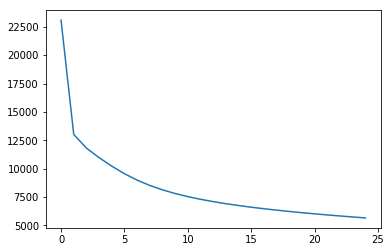

In [32]:
plt.plot(error_cost)
plt.show()

In [33]:
error_cost

[23076.975382688084,
 13016.5656414192,
 11808.398816474059,
 10966.797732593897,
 10216.84663716165,
 9550.333908304756,
 8984.460304617121,
 8515.26077599383,
 8127.363988962858,
 7803.81216796085,
 7530.018527418747,
 7294.662254208968,
 7089.306197754939,
 6907.68201411569,
 6745.067462834295,
 6597.848686690792,
 6463.228405670768,
 6339.024751468348,
 6223.525247749425,
 6115.377916838948,
 6013.509570481139,
 5917.064219416161,
 5825.356066757624,
 5737.832992808633,
 5654.047753608589]

In [34]:
np.save('wh.npy', wh)
np.save('bh.npy', bh)
np.save('wo.npy', wo)
np.save('bo.npy', bo)

# Practice_other

In [101]:
bb = np.logspace(1, 5, num=5, base=3) / 100
bb

array([0.03, 0.09, 0.27, 0.81, 2.43])

In [102]:
bb * 3

array([0.09, 0.27, 0.81, 2.43, 7.29])

In [103]:
bb / 2

array([0.015, 0.045, 0.135, 0.405, 1.215])

In [54]:
gamma = 0.985
gamma**150

0.10361784950198194

In [55]:
(gamma + 1) / 2

0.9924999999999999

In [2]:
aaa = np.arange(20).reshape((4,5))
aaa

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [3]:
df = pd.DataFrame(aaa)
df

,0,1,2,3,4
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


In [4]:
df.to_csv('test_df.csv', mode='a', header=False, index=False)

In [6]:
new_df = pd.read_csv('test_df.csv', header=None)
new_df

,0,1,2,3,4
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19
